In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from Models.Charts import Charts
from Models.P_1 import P_1

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

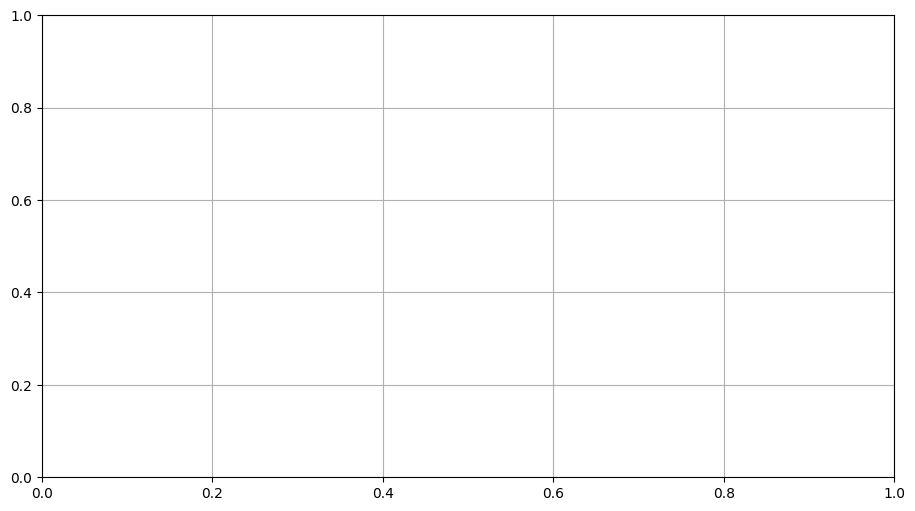

In [12]:
file = 'datos/avocado.csv'
chart = Charts(file)
#Hacemos una limpieza la columna Unnamed
chart.clearData('Unnamed: 0')
# Comprobamos si hay valores nulos
chart.isNull()
chart.showData()
# po = P_1()
# po.p1_1()

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64


(array([16556., 16679., 16801., 16922., 17045., 17167., 17287., 17410.,
        17532.]),
 [Text(16556.0, 0, '2015-05'),
  Text(16679.0, 0, '2015-09'),
  Text(16801.0, 0, '2016-01'),
  Text(16922.0, 0, '2016-05'),
  Text(17045.0, 0, '2016-09'),
  Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01')])

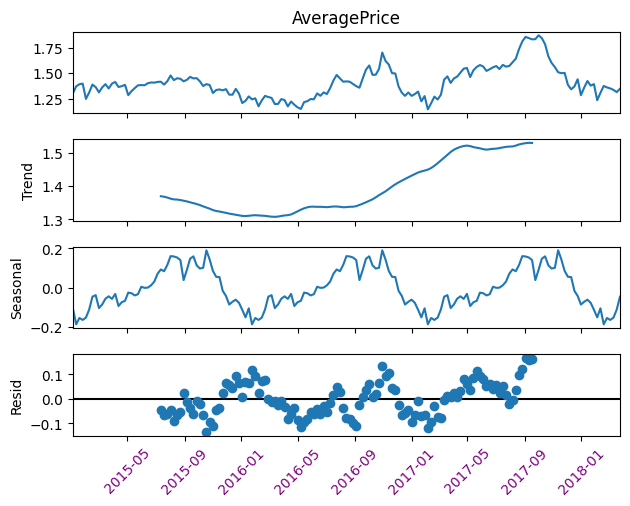

In [13]:
# 1.1 Descomposición de Series Temporales de Precios:

# Uso de Datos: Usa la columna AveragePrice y Date.
# Esperado: Utiliza la función seasonal_decompose de la librería statsmodels para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido.
# Convierte Date a tipo datetime usando pd.to_datetime().
# Agrupa los datos por Date y calcula el promedio de AveragePrice utilizando groupby() si es necesario.
# Visualiza los componentes descompuestos usando matplotlib para cada uno de ellos.
chart.formatDate('Date')
promedio_por_fecha = chart.df.groupby('Date')['AveragePrice'].mean()
print(promedio_por_fecha)
descomposicion = chart.seasonal_decompose(promedio_por_fecha, model='additive',period=54)
descomposicion.plot()
# promedio_por_fecha.plot()
plt.xticks(rotation=45,color="purple")

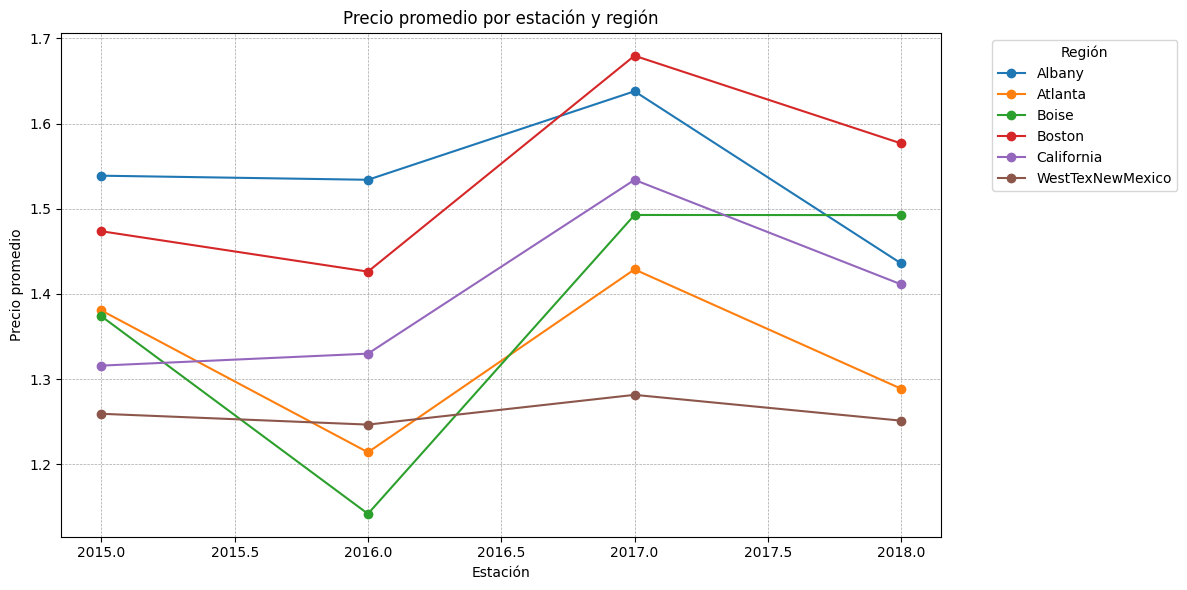

In [24]:
# 1.2 Análisis de Estacionalidad por Región:

# Uso de Datos: Usa las columnas AveragePrice, Date y Total Volume.
# Esperado: Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
# Agrupa los datos por region y Date utilizando groupby().
# Calcula el promedio de AveragePrice para cada región.
# Representa gráficamente las tendencias utilizando plt.plot() de matplotlib.

regiones_seleccionadas = ['Albany', 'Atlanta', 'Boise','Boston','California','WestTexNewMexico']
chart.df['year'] = chart.df['Date'].dt.year
promedio_anual = chart.df[chart.df['region'].isin(regiones_seleccionadas)].groupby(['region', 'year'])['AveragePrice'].mean().reset_index()
chart.figureConfig(12,6,title='Precio promedio por estación y región',xlabel="Estación",ylabel="Precio promedio")

# Itera sobre cada región para graficar su línea
for region in promedio_anual['region'].unique():
    region_data = promedio_anual[promedio_anual['region'] == region]
    plt.plot(region_data['year'], region_data['AveragePrice'], label=region,marker="o")

# Configura el título y etiquetas
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')

# Muestra la gráfica
plt.tight_layout()
plt.grid(True,color='gray', linestyle='--', linewidth=0.5, alpha=0.7, which='both')
plt.show()

# promedio_anual.sample(frac=0.2).sort_values(by=['year', 'region'])


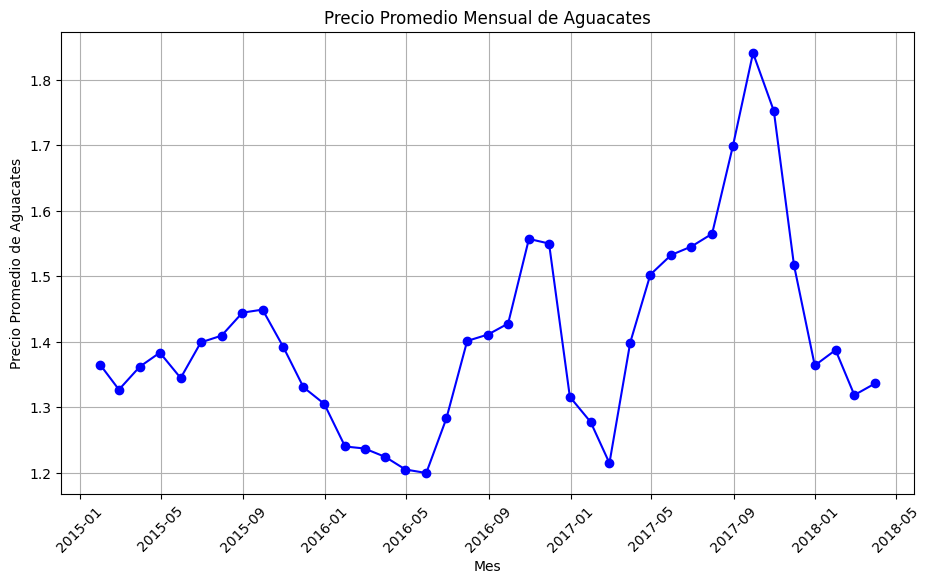

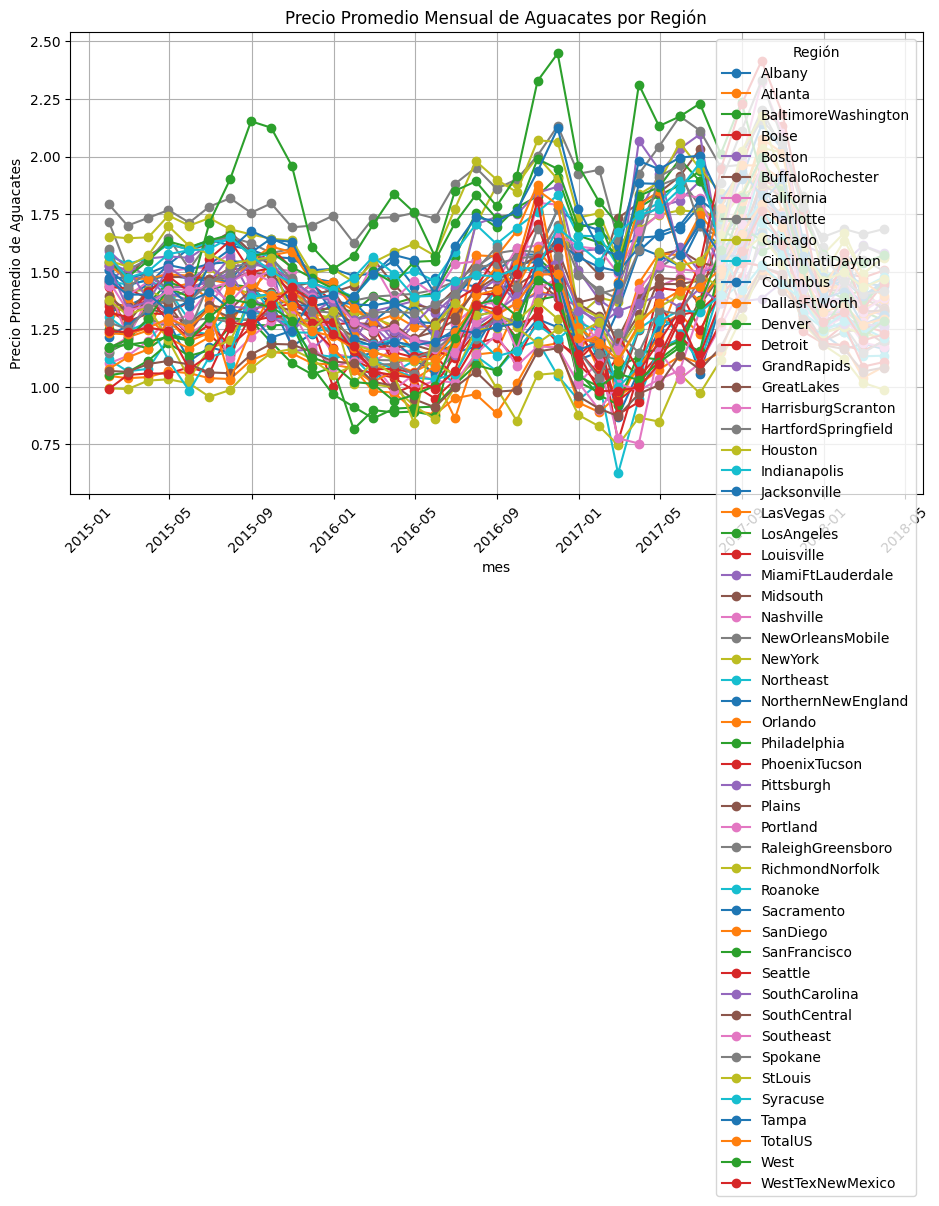

In [28]:
# 1.3 Comparación de Precios Promedio Mensuales:
# Uso de Datos: Usa las columnas AveragePrice y Date.
# Esperado: Calcula y compara los precios promedio mensuales.
# Agrupa los datos por mes usando pd.Grouper con freq='M'.
# Calcula el promedio de AveragePrice para cada mes con mean().
# Visualiza los resultados con un gráfico de líneas usando plt.plot().
# Agrupa los datos por 'region' y por mes, y calcula el promedio de 'AveragePrice'

# Agrupo por mes y calcular el promedio de AveragePrice
promedio_mensual = chart.df.groupby(pd.Grouper(key='Date', freq='ME'))['AveragePrice'].mean().reset_index()

# Tamaño de la figura para el gráfico
chart.figureConfig(title='Precio Promedio Mensual de Aguacates',xlabel="Mes",ylabel="Precio Promedio de Aguacates")

# Graficar el promedio mensual de AveragePrice
plt.plot(promedio_mensual['Date'], promedio_mensual['AveragePrice'], marker='o', label='Precio Promedio Mensual', color='blue')

# Configurar título y etiquetas

plt.xticks(rotation=45)

# plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Ahora agrupar por 'region' y por mes para calcular el promedio
promedio_mensual_region = chart.df.groupby(['region', pd.Grouper(key='Date', freq='ME')])['AveragePrice'].mean().reset_index()

# Tamaño de la figura para el gráfico por región
chart.figureConfig(title='Precio Promedio Mensual de Aguacates por Región',xlabel="mes",ylabel='Precio Promedio de Aguacates')

# Graficar el promedio mensual de AveragePrice por región
for region in promedio_mensual_region['region'].unique():
    region_data = promedio_mensual_region[promedio_mensual_region['region'] == region]
    plt.plot(region_data['Date'], region_data['AveragePrice'], marker='o', label=region)

# Configurar título y etiquetas

plt.xticks(rotation=45)
plt.legend(title='Región')


# Mostrar el gráfico
plt.show()

In [ ]:
# 1.4 Tendencia de Ventas a lo Largo del Tiempo:

# Uso de Datos: Usa las columnas Total Volume y Date.
# Esperado: Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
# Agrupa los datos por Date y suma el Total Volume usando groupby().
# Visualiza los resultados usando un gráfico de líneas con plt.plot() para mostrar la tendencia.
chart.figureConfig(
    title="Tendencia de Ventas a lo Largo del Tiempo",
    xlabel="Fecha",
    ylabel="Volumen Total de Ventas"
    )
# Agrupar por fecha y sumar el volumen total
df_grouped = chart.df.groupby('Date').sum()['Total Volume']
plt.plot(df_grouped.index, df_grouped.values, marker='', color='blue', label='Volumen Total')

plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Aqui la tendencia es que prograsivamente ha ido subiendo la venta de aguacates en los meses de Enero/Febrero y Mayo
# La tendencia es al Alza

In [ ]:
# 1.5 Análisis de Cambios en Precios Anuales:

# Uso de Datos: Usa las columnas AveragePrice y year.
# Esperado: Observa las diferencias anuales en los precios promedio.
# Agrupa los datos por year utilizando groupby().
# Calcula el promedio de AveragePrice para cada año.
# Representa los resultados en un gráfico de barras usando plt.bar() que compare los precios de cada año.
promedio_year =  chart.df.groupby('year')['AveragePrice'].mean().reset_index()
chart.figureConfig(title="Cambios en el Precio Promedio de Aguacates por Año",xlabel="Año",ylabel="Precio Promedio")
# Crear el gráfico de barras
plt.bar(promedio_year['year'], promedio_year['AveragePrice'], width=0.5)
plt.xticks(promedio_year['year'])  # Asegura que se muestren todos los años
plt.tight_layout()
plt.show()

In [ ]:
# 2.1 Gráficos para Visualización de Datos
# Resumen: La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. 
# Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

# Gráfico de Violín de Volumen de Ventas por Región:
# Uso de Datos: Usa las columnas Total Volume y region.
# Esperado: Visualiza la distribución de ventas en diferentes regiones.
# Utiliza la función violinplot de seaborn para crear gráficos de violín.
# Configura los ejes para mostrar la relación entre Total Volume y region.
# Añade etiquetas y títulos usando plt.title() y plt.xlabel() para facilitar la interpretación.

# Gráfico de violín de Volumen de Ventas por Región
chart.figureConfig(title='Distribución de Volumen de Ventas por Región',xlabel="Región",ylabel='Distribución de Volumen de Ventas por Región')


sns.violinplot(x='region', y='Total Volume', data=chart.df, palette="muted",legend=False)

# Configuraciones del gráfico
plt.xticks(rotation=90)  # Rotar etiquetas para mejorar visibilidad


plt.tight_layout()  # Ajusta el diseño para evitar superposición
plt.show()

In [ ]:
# 2.2 Boxplot Comparativo de Precios entre Años:

# Uso de Datos: Usa las columnas AveragePrice y year.
# Esperado: Genera boxplots para comparar la distribución de precios.
# Utiliza boxplot de seaborn para crear boxplots que comparen AveragePrice entre diferentes años.
# Asegúrate de que cada boxplot represente un año diferente.
# Incluye etiquetas y títulos descriptivos usando plt.title().


# Gráfico boxplot comparativo de Precios entre Años
chart.figureConfig(title='Comparación de Precios Promedio entre Años',ylabel='Precio Promedio',xlabel='Año')
sns.boxplot(x='year', y='AveragePrice', data=chart.df, palette="Set3", hue='year', legend=False)
# Configuraciones del gráfico
plt.show()

In [ ]:
# 2.3 Histograma de Volumen Total de Ventas:

# Uso de Datos: Usa la columna Total Volume.
# Esperado: Crea un histograma para mostrar la distribución del volumen total de ventas.
# Utiliza hist() de matplotlib para crear el histograma.
# Ajusta el número de bins para una visualización clara usando el parámetro bins.
# Añade etiquetas y un título que describa lo que se muestra.

chart.figureConfig(title='Histograma del Volumen Total de Ventas',xlabel="Volumen total de ventas",ylabel="Frecuencia")
plt.hist(chart.df['Total Volume'], bins=30, color='blue', alpha=0.7)

# Mostrar el gráfico
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# 2.4 Gráfico de Barras de Ventas por Tipo de Bolsa:

# Uso de Datos: Utiliza las columnas Total Bags, Small Bags, Large Bags y XLarge Bags.
# Esperado: Compara las ventas de diferentes tipos de bolsas.
# Suma los volúmenes de ventas por tipo de bolsa utilizando sum().
# Crea un gráfico de barras con plt.bar() para mostrar las diferencias en ventas.
# Asegúrate de incluir etiquetas para cada tipo de bolsa.

# Sumar los volúmenes de ventas por tipo de bolsa
total_bags = chart.df['Total Bags'].sum()
small_bags = chart.df['Small Bags'].sum()
large_bags = chart.df['Large Bags'].sum()
xlarge_bags = chart.df['XLarge Bags'].sum()

# Crear una lista de tipos de bolsas y sus correspondientes ventas
labels = ['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
sales = [total_bags, small_bags, large_bags, xlarge_bags]

# Crear el gráfico de barras
chart.figureConfig(title='Comparación de Ventas por Tipo de Bolsa',ylabel='Volumen Total de Ventas')
plt.bar(labels, sales, color=['blue', 'orange', 'green', 'red'], alpha=0.7)

# Añadir etiquetas y título
plt.ylim(0, max(sales) * 1.1)  # Ajustar el límite del eje y

# Mostrar el gráfico
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# 2.5 Gráfico de Líneas de Precios Promedios por Año:

# Uso de Datos: Utiliza las columnas AveragePrice y year.
# Esperado: Visualiza la tendencia de precios promedio a lo largo de los años.
# Agrupa los datos por year y calcula el promedio de AveragePrice.
# Usa plt.plot() para crear un gráfico de líneas que muestre la evolución de precios.
# Añade un título y etiquetas descriptivas a los ejes usando plt.title() y plt.xlabel().
# Agrupar los datos por año y calcular el promedio de AveragePrice
average_price_by_year = chart.df.groupby('year')['AveragePrice'].mean().reset_index()

# Crear el gráfico de líneas
chart.figureConfig(title="Tendencia de Precios Promedios por Año",xlabel="Año",ylabel="Precio Promedio")
plt.plot(average_price_by_year['year'], average_price_by_year['AveragePrice'], marker='o', color='blue', linestyle='-')

# Mostrar el gráfico
plt.grid()
plt.xticks(average_price_by_year['year'])  # Asegurar que se muestren todos los años en el eje x
plt.show()

In [ ]:
# Elasticidad del Precio
# 3.1 Elasticidad Precio-Demanda por Año:

# Uso de Datos: Usa las columnas AveragePrice y Total Volume.
# Esperado: Calcula la elasticidad del precio de la demanda para cada año.
# Calcula la variación porcentual de Total Volume y AveragePrice utilizando pd.pct_change().
# Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
# Presenta los resultados en un gráfico de líneas usando plt.plot() para mostrar la elasticidad por año.
# Asegúrate de que la columna 'Date' esté en formato datetime

# Añadir columna 'year'
chart.df['year'] = chart.df['Date'].dt.year

# Agrupar por año y calcular la suma de Total Volume y el promedio de AveragePrice
yearly_data = chart.df.groupby('year').agg(
    {
        'Total Volume': 'sum', 
        'AveragePrice': 'mean'
    }
).reset_index()

# Calcular la variación porcentual
yearly_data['Volume_pct_change'] = yearly_data['Total Volume'].pct_change()
yearly_data['Price_pct_change'] = yearly_data['AveragePrice'].pct_change()

print(yearly_data)
# Calcular la elasticidad
yearly_data['Elasticity'] = (yearly_data['Volume_pct_change'] / yearly_data['Price_pct_change']).fillna(0)
print(yearly_data['Elasticity'])

# Visualizar resultados
chart.figureConfig(title='Elasticidad Precio-Demanda por Año',xlabel='Año',ylabel='Elasticidad')
plt.plot(yearly_data['year'], yearly_data['Elasticity'], marker='o')
plt.grid()
plt.axhline(0, color='red', linestyle='--', label='Elasticidad = 0')  # Línea de referencia
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 3.2 Comparación de Elasticidad en Diferentes Mercados:

# Uso de Datos: Utiliza las columnas Total Volume y AveragePrice.
# Esperado: Calcula la elasticidad del precio de la demanda en diferentes regiones.
# Agrupa los datos por region y calcula la elasticidad para cada región utilizando pd.pct_change().


el_price_vs_demanda_pivot = chart.df.pivot_table(
    values=["AveragePrice"],
    index=["year","region"],
    aggfunc=["mean"]
).reset_index()

# print(el_price_vs_demanda_pivot)

el_price_vs_demanda['pct_change_volume'] = el_price_vs_demanda.groupby('region')['Total Volume'].pct_change().fillna(0)
el_price_vs_demanda['pct_change_price'] = el_price_vs_demanda.groupby('region')['AveragePrice'].pct_change().fillna(0)


pd.DataFrame(el_price_vs_demanda_pivot)
pd.DataFrame(el_price_vs_demanda)


In [ ]:
# Continuacion 3.2
# Presenta un gráfico de barras que muestre la elasticidad por región usando plt.bar().

# Asegúrate de que 'Date' esté en formato datetime y extrae el año si es necesario
chart.df['Date'] = pd.to_datetime(chart.df['Date'])
chart.df['year'] = chart.df['Date'].dt.year

# Agrupa por año y región, y calcula el promedio de 'AveragePrice' y la suma de 'Total Volume'
el_price_vs_demanda = chart.df.groupby(['year', 'region']).agg({
    'Total Volume': 'sum',
    'AveragePrice': 'mean'
}).reset_index()

# Calcula el cambio porcentual de volumen y precio para cada región
# pct_change() es Cambio porcentual

el_price_vs_demanda['pct_change_volume'] = el_price_vs_demanda.groupby('region')['Total Volume'].pct_change().fillna(0)
el_price_vs_demanda['pct_change_price'] = el_price_vs_demanda.groupby('region')['AveragePrice'].pct_change().fillna(0)

# Calcula la elasticidad como el cociente entre el cambio porcentual de volumen y de precio
el_price_vs_demanda['elasticidad'] = el_price_vs_demanda['pct_change_volume'] / el_price_vs_demanda['pct_change_price']

# Filtra regiones sin valores NaN en elasticidad
elasticidad_por_region = el_price_vs_demanda.dropna(subset=['elasticidad'])

# Agrupa por región para obtener la elasticidad promedio de cada región
elasticidad_media_por_region = elasticidad_por_region.groupby('region')['elasticidad'].mean().reset_index()

# Graficar elasticidad promedio por región
chart.figureConfig(11, 7,title="Elasticidad Precio-Demanda por Región",xlabel="Región",ylabel="Elasticidad Precio-Demanda Promedio")
plt.bar(elasticidad_media_por_region['region'], elasticidad_media_por_region['elasticidad'], color='skyblue')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# 3.3 Elasticidad a Nivel de Tipo de Bolsa:

# Uso de Datos: Usa las columnas AveragePrice y Total Bags.
# Esperado: Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
# Suma los volúmenes de ventas por tipo de bolsa utilizando groupby() y sum().
# Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando plt.bar().
# Small Bags	Large Bags	XLarge Bags	
volumen_ventas_sm_bag = chart.df.groupby('region').agg(
    {
        'Small Bags': 'sum', 
        'Large Bags': 'sum',
        'XLarge Bags': 'sum',
        'AveragePrice':'mean'
    }
).reset_index()


pd.DataFrame(volumen_ventas_sm_bag)
chart.figureConfig(title="elasticidad del precio de la demanda específica para cada tipo de bolsa")
volumen_ventas_sm_bag.grid()
volumen_ventas_sm_bag.plot()



In [ ]:
# 3.4 Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:

# Uso de Datos: Usa las columnas AveragePrice, Total Volume y type.
# Esperado: Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
# Agrupa los datos por type y calcula la elasticidad utilizando pd.pct_change().
# Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando plt.bar()

In [ ]:
# 3.5 Análisis de la Elasticidad Precios-Ventas:

# Uso de Datos: Usa las columnas AveragePrice y Total Volume.
# Esperado: Examina cómo las variaciones en AveragePrice afectan a Total Volume.
# Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
# Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando plt.scatter() y plt.plot()